In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.metrics as sm
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving EDMexp.xlsx to EDMexp.xlsx


In [ ]:
dataset = pd.read_excel('EDMexp.xlsx')
dataset.head()

,Sr.no,I,ton,V,Sa
0,1,20,200,50,11.0955
1,2,20,200,50,10.2618
2,3,20,200,50,10.7378
3,4,20,200,50,11.2654
4,5,20,200,50,12.4525


In [ ]:
x= dataset.iloc[:, 1:4].values
y=dataset['Sa']
#x

In [ ]:
from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=1/3, random_state=0)

In [ ]:
from sklearn.svm import SVR

regression = SVR(kernel = 'linear')
regression.fit(xtrain, ytrain)
ypred = regression.predict(xtest)


In [ ]:
 #R2 values
from sklearn.metrics import r2_score
R2_MRR = r2_score(ytest, ypred)
print('R2 score for Sa (SVR)=', R2_MRR)

R2 score for Sa (SVR)= 0.45249594643077795


In [ ]:
regression.score(x, y)

0.39304141211831833

In [ ]:
regression.predict(xtest)

array([11.01681245,  6.93769677,  6.93769677, 10.76907906,  6.93769677,
        8.1322464 , 10.76907906, 11.89419474, 11.01681245,  6.93769677,
        9.25736209, 11.01681245, 10.76907906,  7.25486411,  9.57452943,
        8.44941374,  9.25736209,  9.89169677,  8.69714713,  8.44941374,
        8.37997979,  7.25486411, 11.89419474,  8.1322464 ,  8.69714713,
       11.89419474,  7.25486411,  6.93769677,  8.1322464 ,  8.37997979,
       11.01681245, 10.45191172,  8.69714713,  7.25486411, 10.76907906,
        6.93769677, 10.76907906,  8.44941374, 10.45191172,  6.93769677,
       10.45191172])

In [ ]:
print('Weights for support vector regression:' , regression.coef_)
print('Intercept(b) for support vector regression:', regression.intercept_)
#print('Indices of support vectors = ', regression.support_)
#print('Support vectors = ', regression.support_vectors_)
#print('Number of support vectors for each class = ', regression.n_support_)
#print('Coefficients of the support vector in the decision function = ', np.abs(regression.dual_coef_))

Weights for support vector regression: [[ 0.05625578 -0.01318416 -0.02924608]]
Intercept(b) for support vector regression: [13.74309985]


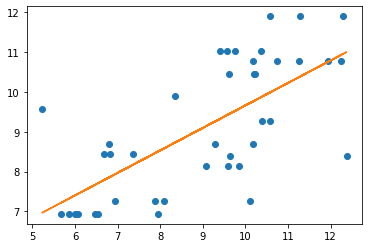

In [ ]:
plt.plot(ytest, ypred, 'o')
m, b = np.polyfit(ytest, ypred, 1)
#m = slope, b=intercept
plt.plot(ytest, m*ytest + b)


In [ ]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()
regressor.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
regressor.score(x, y)

0.4109095071917742

In [ ]:
pred = regressor.predict(xtest)

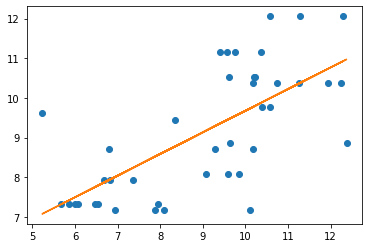

In [ ]:
plt.plot(ytest, pred, 'o')
m, b = np.polyfit(ytest, pred, 1)
#m = slope, b=intercept
plt.plot(ytest, m*ytest + b)
ytest1=m*ytest + b

In [ ]:

#R2 values
from sklearn.metrics import r2_score
R2_MRR = r2_score(ytest, pred)
print('R2 score for MRR (LINEAR REGRESSION)=', R2_MRR)

R2 score for MRR (LINEAR REGRESSION)= 0.4584540013749475


In [ ]:
print('Weights for linear regression:' ,regressor.coef_)
print('Intercept for linear regression:', regressor.intercept_)


Weights for linear regression: [ 0.08458617 -0.01141824 -0.03045382]
Intercept for linear regression: 12.481149014456177


In [ ]:

import statsmodels.api as sm

import statsmodels.formula.api as smf
mod = smf.ols(formula=' Sa ~ I +	ton	+ V	 ', data=dataset)

res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     Sa   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     27.47
Date:                Sun, 25 Apr 2021   Prob (F-statistic):           1.61e-13
Time:                        17:20:07   Log-Likelihood:                -234.16
No. Observations:                 121   AIC:                             476.3
Df Residuals:                     117   BIC:                             487.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.5957      0.919     13.708      0.0